In [ ]:
#!pip install nltk 
#nltk.download("punkt")
#nltk.download("popular")
#nltk.download('punkt_tab') 

#Install these

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nrclex import NRCLex

In [ ]:
df = pd.read_csv(r"spotify_millsongdata.csv") #Change this to the path of your csv file
df = df.head(25000)

In [3]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.tail(10)

,artist,song,link,text
24990,Bee Gees,Don't Throw It All Away,/b/bee+gees/dont+throw+it+all+away_10028094.html,Maybe I don't wanna know the reason why \r\nB...
24991,Bee Gees,Don't Wanna Live Inside Myself,/b/bee+gees/dont+wanna+live+inside+myself_2001...,I am the searcher of my fortunes \r\nI've got...
24992,Bee Gees,Down The Road,/b/bee+gees/down+the+road_20015838.html,1974 \r\nI don't need anybody . I don't need ...
24993,Bee Gees,Down To Earth,/b/bee+gees/down+to+earth_20015609.html,"Hello there, Is there any air? Can you slow me..."
24994,Bee Gees,Edison,/b/bee+gees/edison_20015632.html,He made electric lights to read. \r\nHe gave ...
24995,Bee Gees,Elisa,/b/bee+gees/elisa_20015702.html,Elisa \r\nBee Gees \r\n \r\nAll that I need...
24996,Bee Gees,Every Christian Lion Hearted Man Will Show You,/b/bee+gees/every+christian+lion+hearted+man+w...,Oh solo Dominique [Repeat: x4] \r\n \r\nTake...
24997,Bee Gees,Evolution,/b/bee+gees/evolution_20015845.html,There's a law in what we do \r\nWe got a ques...
24998,Bee Gees,Fallen Angel,/b/bee+gees/fallen+angel_20015667.html,"Fool in the night on the stair, \r\nWith the ..."
24999,Bee Gees,Fight,/b/bee+gees/fight_20015853.html,No matter how long it takes \r\nNo mater how ...


In [5]:
df.shape

(25000, 4)

In [6]:
df = df.drop("link" , axis  =1).reset_index(drop = True)

In [7]:
df.head(45)

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,"Chiquitita, tell me what's wrong \r\nYou're e..."
8,ABBA,Crazy World,I was out with the morning sun \r\nCouldn't s...
9,ABBA,Crying Over You,I'm waitin' for you baby \r\nI'm sitting all ...


In [9]:
df.shape

(25000, 3)

text cleaing is happening down here

In [10]:
print(df.columns)


Index(['artist', 'song', 'text'], dtype='object')


In [11]:
df['text'] = df['text'].str.lower().replace({r'^\w\s': ' ', r'\n': ' '}, regex=True)
 #'^a-ZA - Z0 - 9' --> ^\W\s

steamer ===> converting all data into one kind of vector == vectorization and calculate the distance , content based recommendation system is happening

In [ ]:

nltk.data.find('tokenizers/punkt')


FileSystemPathPointer('C:\\Users\\chari\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt')

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)


tokenization is now happening

In [17]:
tokenization("Making somebody happy")

'make somebodi happi'

In [18]:
df['text'].apply(lambda x: tokenization(x))

0        look at her face , it 's a wonder face and it ...
1        take it easi with me , pleas touch me gentli l...
2        i 'll never know whi i had to go whi i had to ...
3        make somebodi happi is a question of give and ...
4        make somebodi happi is a question of give and ...
                               ...                        
24995    elisa bee gee all that i need is just a piec o...
24996    oh solo dominiqu [ repeat : x4 ] take thi in h...
24997    there 's a law in what we do we got a quest fo...
24998    fool in the night on the stair , with the ligh...
24999    no matter how long it take no mater how long n...
Name: text, Length: 25000, dtype: object

In [20]:
tfid = TfidfVectorizer(analyzer='word', stop_words='english')

In [21]:
matrix = tfid.fit_transform(df['text'])

In [22]:
similar  = cosine_similarity(matrix)

In [23]:
similar

array([[1.        , 0.0014874 , 0.01007092, ..., 0.09242715, 0.04445007,
        0.01532453],
       [0.0014874 , 1.        , 0.00407309, ..., 0.0180441 , 0.0065487 ,
        0.0483466 ],
       [0.01007092, 0.00407309, 1.        , ..., 0.01912439, 0.00756775,
        0.03253764],
       ...,
       [0.09242715, 0.0180441 , 0.01912439, ..., 1.        , 0.02887106,
        0.03504428],
       [0.04445007, 0.0065487 , 0.00756775, ..., 0.02887106, 1.        ,
        0.00645321],
       [0.01532453, 0.0483466 , 0.03253764, ..., 0.03504428, 0.00645321,
        1.        ]])

Rcommender Function


In [ ]:
def recommender(song_name):

    song_name_lower = song_name.lower()

    if song_name_lower not in df['song'].str.lower().values:
        raise ValueError(f"'{song_name}' not found in the dataset.")

    idx = df[df['song'].str.lower() == song_name_lower].index[0]

    # Get similarity scores for that song (based on lyrics)
    distance = list(enumerate(similar[idx]))
    distance = sorted(distance, key=lambda x: x[1], reverse=True)

    # Collect top 10 recommendations excluding the song itself
    recommended_songs = []
    for i in distance[1:11]:  # Skip same song
        recommended_songs.append(df.iloc[i[0]]['song'])

    return recommended_songs


In [25]:
recommender("Crazy World")

['Crazy',
 'Crazy',
 'Crazy',
 'Crazy',
 'Crazy',
 'Off The Edge',
 'Family Values',
 'Girl',
 'Merry Go Round',
 'A Crazy World Like This']

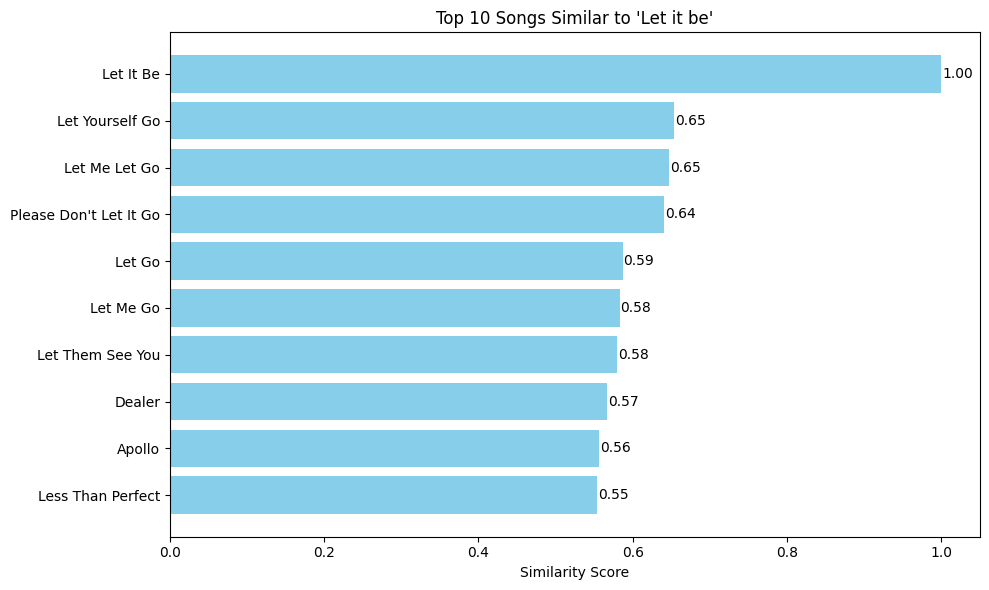

In [27]:
def plot_recommendations(song_name):
    idx = df[df['song'].str.lower() == song_name.lower()].index[0]
    similarity_scores = sorted(list(enumerate(similar[idx])), key=lambda x: x[1], reverse=True)[1:11]
    
    songs = [df.iloc[i[0]]['song'] for i in similarity_scores]
    scores = [i[1] for i in similarity_scores]

    plt.figure(figsize=(10, 6))
    bars = plt.barh(songs[::-1], scores[::-1], color='skyblue')
    plt.xlabel("Similarity Score")
    plt.title(f"Top 10 Songs Similar to '{song_name}'")
    plt.tight_layout()

    for bar, score in zip(bars, scores[::-1]):
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                 f'{score:.2f}', va='center')

    plt.show()

plot_recommendations("Let it be")


In [ ]:
def analyze_sentiments(song_list):
    sentiments = []
    for song in song_list:
        lyrics = df[df['song'] == song]['text'].values
        if len(lyrics) == 0:
            continue
        blob = TextBlob(lyrics[0])
        sentiments.append((song, blob.sentiment.polarity))
    return sentiments

In [29]:
def plot_sentiments(sentiment_data):
    songs = [s[0] for s in sentiment_data]
    scores = [s[1] for s in sentiment_data]
    
    plt.figure(figsize=(10, 5))
    bars = plt.barh(songs, scores, color='salmon')
    plt.xlabel("Sentiment Polarity")
    plt.title("Sentiment of Recommended Songs")
    plt.axvline(0, color='black', linestyle='--')

    for bar, score in zip(bars, scores):
        plt.text(score, bar.get_y() + bar.get_height()/2, f'{score:.2f}', va='center')
    plt.tight_layout()
    plt.show()

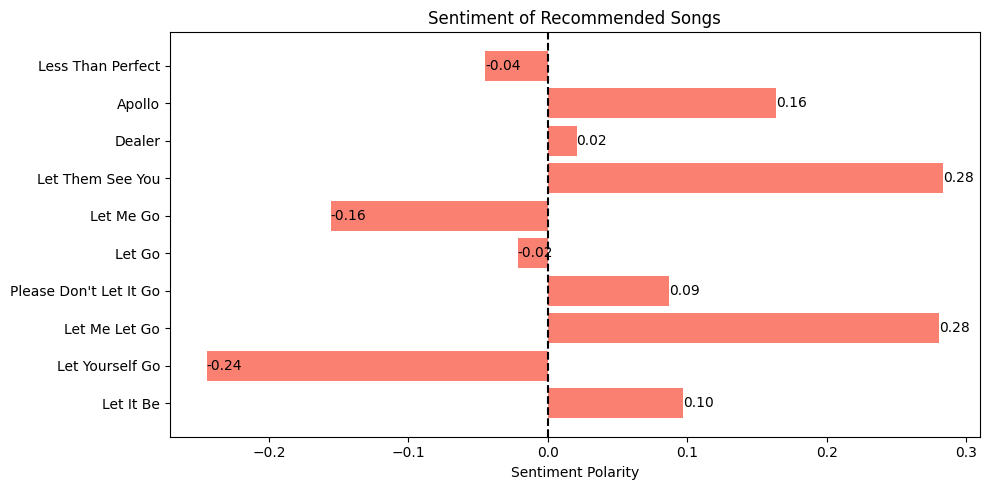

In [30]:
recs = recommender("Let it be")
sentiment_data = analyze_sentiments(recs)
plot_sentiments(sentiment_data)

In [ ]:
def plot_lyrics_wordcloud(song_name, recommendations):
    # Get lyrics of all recommended songs
    texts = df[df['song'].isin(recommendations)]['text'].dropna().values
    combined_text = " ".join(texts)

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Lyrics WordCloud of Recommendations for '{song_name}'")
    plt.show()


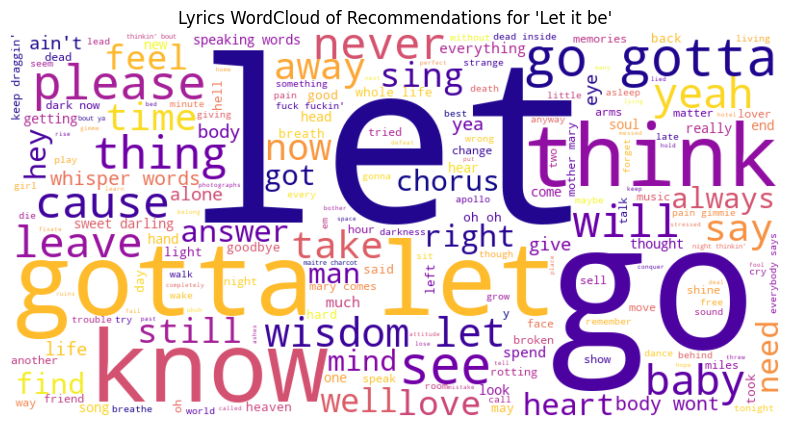

In [32]:
plot_lyrics_wordcloud("Let it be", recs)

In [ ]:

def get_lyrics_emotions(song_name):
    row = df[df['song'].str.lower() == song_name.lower()]
    if row.empty:
        return f"'{song_name}' not found"
    
    lyrics = row.iloc[0]['text']
    if not isinstance(lyrics, str) or not lyrics.strip():
        return f"No lyrics found for '{song_name}'"

    text_object = NRCLex(lyrics)
    emotion_scores = text_object.raw_emotion_scores
    return emotion_scores


In [ ]:

def analyze_and_plot_emotions(song_name):
    row = df[df['song'].str.lower() == song_name.lower()]
    if row.empty:
        print(f"'{song_name}' not found in dataset.")
        return

    lyrics = row.iloc[0]['text']
    if not isinstance(lyrics, str) or not lyrics.strip():
        print(f"No lyrics found for '{song_name}'.")
        return

    text_object = NRCLex(lyrics)
    emotion_scores = text_object.raw_emotion_scores

    if not emotion_scores:
        print(f"No detectable emotions found in '{song_name}'.")
        return
   
    dominant_emotion = max(emotion_scores, key=emotion_scores.get)

    plt.figure(figsize=(8, 4))
    plt.bar(emotion_scores.keys(), emotion_scores.values(), color='mediumseagreen')
    plt.title(f"Emotions in '{song_name}'")
    plt.xlabel("Emotion")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    print(f"🎶 Based on the lyrics, '{song_name}' expresses **{dominant_emotion.upper()}** the most.")


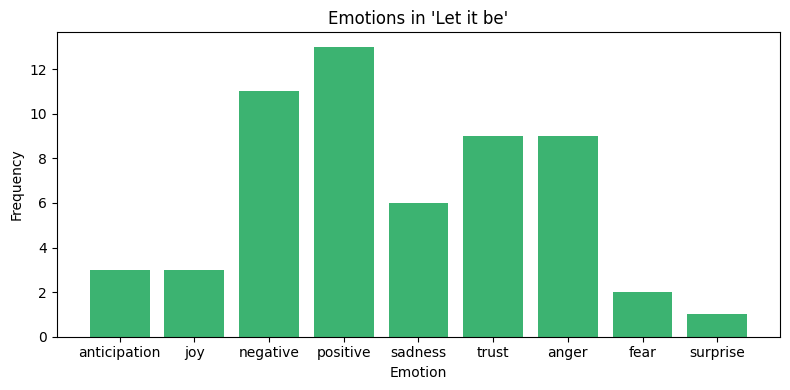

🎶 Based on the lyrics, 'Let it be' expresses **POSITIVE** the most.


In [ ]:
analyze_and_plot_emotions("Let it be")